<a href="https://colab.research.google.com/github/Abhinair26/Uber-Supply-and-Demand/blob/main/Uber_Supply_and_Demand_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# Load the dataset
df = pd.read_csv('Uber Request Data.csv')

In [17]:
# Show initial info
print("Initial DataFrame Info:")
print(df.info())
print("\nMissing values:\n", df.isnull().sum())

Initial DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB
None

Missing values:
 Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
dtype: int64


In [18]:
# Convert dates
df['Request timestamp'] = pd.to_datetime(df['Request timestamp'], dayfirst=True, errors='coerce')
df['Drop timestamp'] = pd.to_datetime(df['Drop timestamp'], dayfirst=True, errors='coerce')

In [19]:
# Extract features
df['Request hour'] = df['Request timestamp'].dt.hour
df['Request day'] = df['Request timestamp'].dt.date
df['Request month'] = df['Request timestamp'].dt.month
df['Request weekday'] = df['Request timestamp'].dt.day_name()
df['Time slot'] = pd.cut(df['Request hour'],
                         bins=[0, 4, 8, 12, 16, 20, 24],
                         labels=['Late Night', 'Early Morning', 'Morning', 'Afternoon', 'Evening', 'Night'],
                         right=False)


In [20]:
# Drop rows with missing request timestamps
df = df.dropna(subset=['Request timestamp'])

<ipython-input-21-1068649859>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Status', palette='Set2')


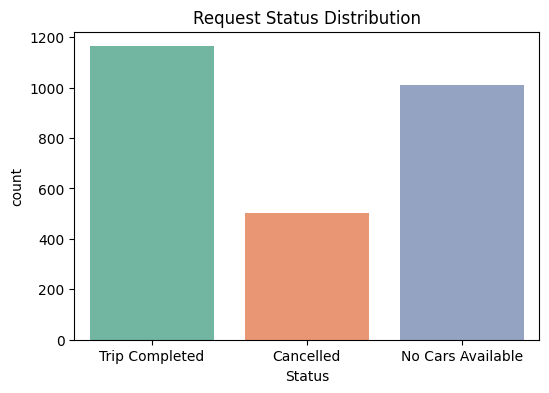

In [21]:
# 1. Plot request status distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Status', palette='Set2')
plt.title('Request Status Distribution')
plt.show()

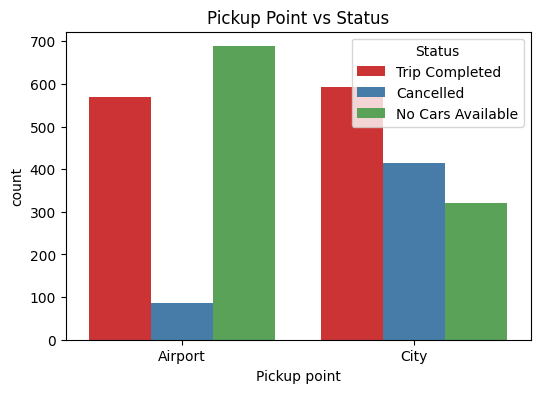

In [22]:
# 2. Plot frequency by pickup point
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Pickup point', hue='Status', palette='Set1')
plt.title('Pickup Point vs Status')
plt.show()

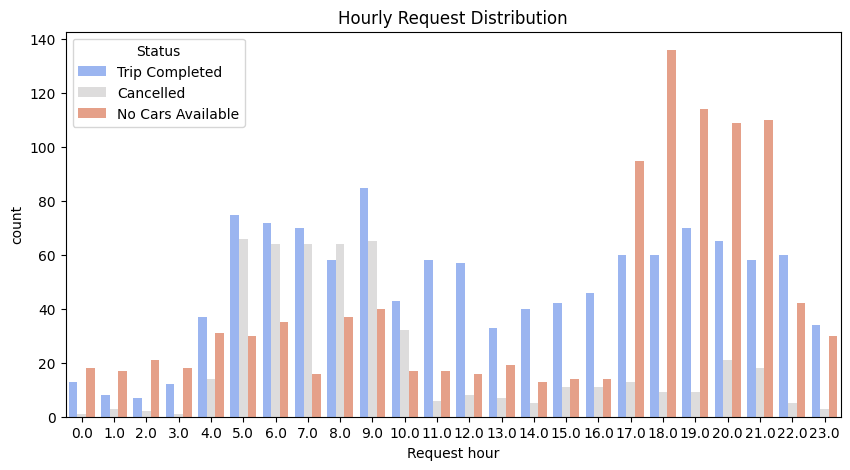

In [23]:
# 3. Plot hourly demand
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Request hour', hue='Status', palette='coolwarm')
plt.title('Hourly Request Distribution')
plt.xticks(rotation=0)
plt.show()

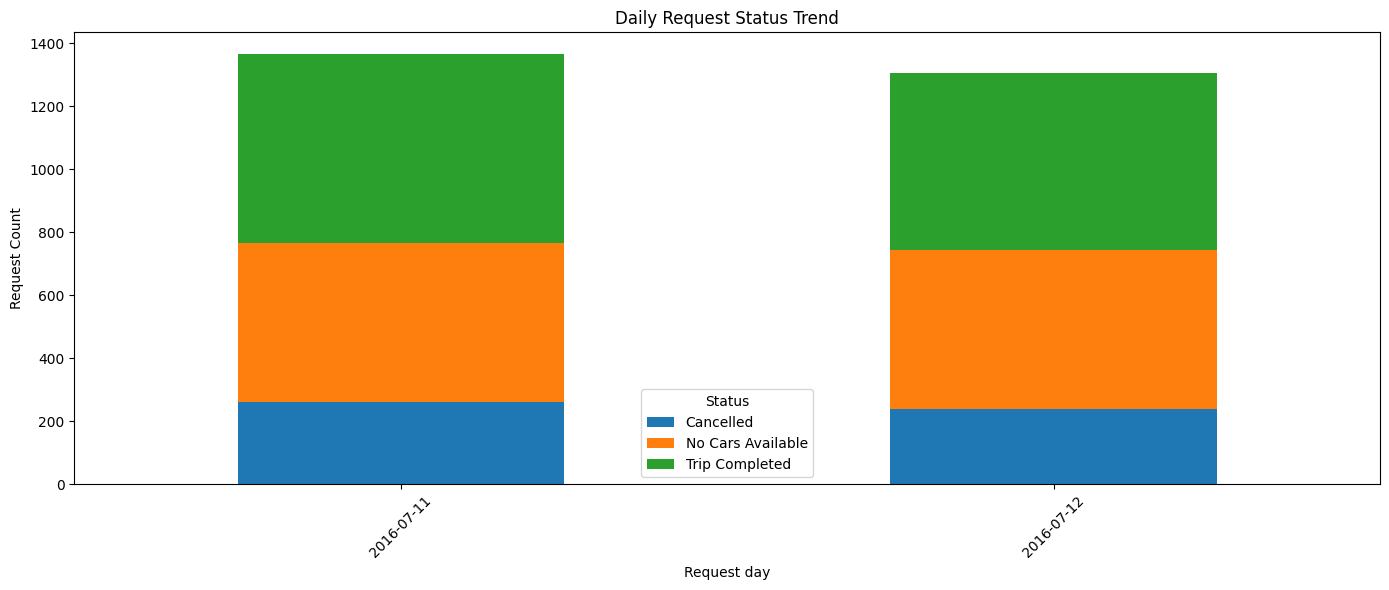

In [24]:
# 4. Demand over time
daily_status = df.groupby(['Request day', 'Status']).size().unstack().fillna(0)
daily_status.plot(kind='bar', stacked=True, figsize=(14,6))
plt.title('Daily Request Status Trend')
plt.ylabel('Request Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

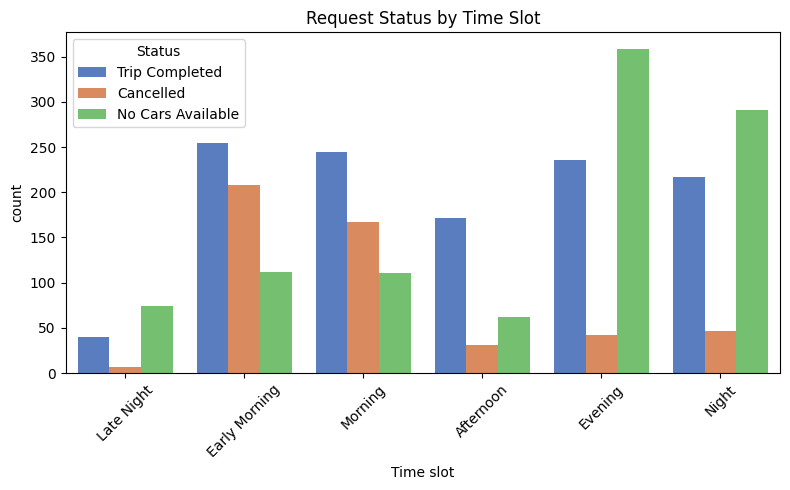

In [25]:
# 5. Time slot vs status
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Time slot', hue='Status', palette='muted')
plt.title('Request Status by Time Slot')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [26]:
# ----- Summary Insights -----
print("\nInsight 1: Total requests\n", df['Status'].value_counts())
print("\nInsight 2: Problem areas by Pickup point\n", pd.crosstab(df['Pickup point'], df['Status'], normalize='index'))
print("\nInsight 3: Time slots with highest cancellations or no cars\n", pd.crosstab(df['Time slot'], df['Status'], normalize='index'))



Insight 1: Total requests
 Status
Trip Completed       1163
No Cars Available    1009
Cancelled             502
Name: count, dtype: int64

Insight 2: Problem areas by Pickup point
 Status        Cancelled  No Cars Available  Trip Completed
Pickup point                                              
Airport        0.064684           0.511524        0.423792
City           0.312265           0.241535        0.446200

Insight 3: Time slots with highest cancellations or no cars
 Status         Cancelled  No Cars Available  Trip Completed
Time slot                                                  
Late Night      0.057851           0.611570        0.330579
Early Morning   0.362369           0.195122        0.442509
Morning         0.319923           0.212644        0.467433
Afternoon       0.116981           0.233962        0.649057
Evening         0.065934           0.563579        0.370487
Night           0.084685           0.524324        0.390991
